# Cheatsheet (rechnerisch)
>## <ins>Table of contents</ins> <a name="up"></a>[<sup>[1]</sup>](#cite_note-1)
>* [**K2. Überwachtes Lernen**](#2)
    * [**2.1. Lineare Regression**](#2.1.)
    * [**2.2. Lineare Regression**](#2.2.)
    * [**2.3. Lineare Regression**](#2.3.)
    * [**2.4. Lineare Regression**](#2.4.)
>* [**K3. Motivation und Grundlagen**](#3)
>* [**K4. Motivation und Grundlagen**](#4)
>* [**K5. Motivation und Grundlagen**](#5)
    * [**5.1. RNN**](#5.1.)
       * [**5.1. RNN**](#5.1.)
    * [**5.3. RNN**](#5.3.)
       * [**spaltenweise Konkatenation zweier Matrizen**](#5.3.1.)
       * [**One-Hot-Codierung**](#5.3.2.)
       * [**Berechnungsgraphen**](#5.3.3.)

>


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

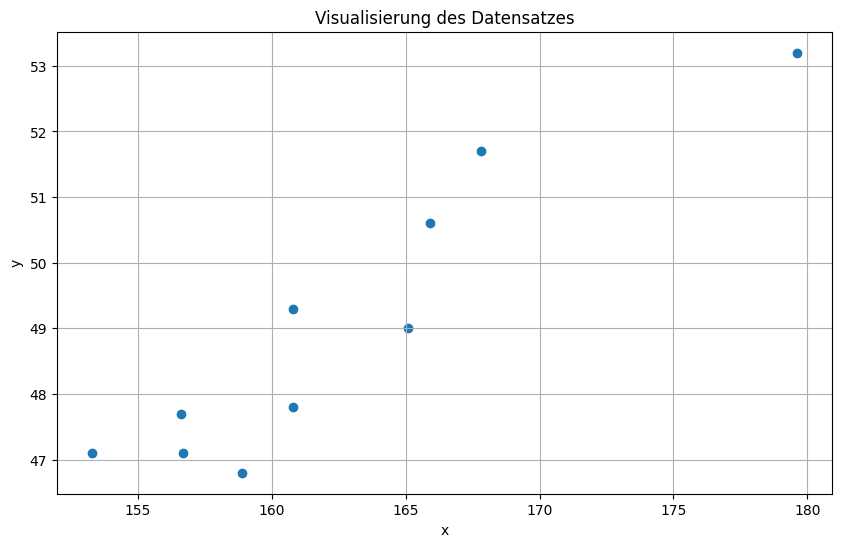

In [23]:
# Datensatz visualisieren
def visualise_datensatz(x,y):
    # Erstellen Sie das Diagramm
    plt.figure(figsize=(10, 6))
    plt.scatter(x,y)
    plt.title('Visualisierung des Datensatzes')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
visualise_datensatz(X,y)

## 2 Überwachtes Lernen <a name=2><a>

### 2.1. Lineare Regression <a name=2.1.><a>

#### 1. 2D modell

In [10]:
# Ihre Daten
D = [
    ((153.3), 47.1),
    ((158.9), 46.8),
    ((160.8), 49.3),
    ((179.6), 53.2),
    ((156.6), 47.7),
    ((165.1), 49.0),
    ((165.9), 50.6),
    ((156.7), 47.1),
    ((167.8), 51.7),
    ((160.8), 47.8)
]

theta = (-4, 1/3)
lambda_ = 0.1


In [11]:

def h(theta, x):
    return theta[0] + theta[1]*x

def mse(D, h, theta):
    return sum((h(theta, x) - y)**2 for (x, y) in D)

L = mse(D, h, theta)
print(f'Der quadratische Fehler für D und theta ist {round(L,3)}')


Der quadratische Fehler für D und theta ist 21.349


R²-Wert

In [12]:
def r2_wert(L, D):
    y_values = [y for (_, y) in D]
    mean_y = sum(y_values) / len(y_values)  
    squared_diff = sum((y - mean_y) ** 2 for y in y_values)
    return 1 - L/squared_diff

print(f'R²-Wert: {round(r2_wert(L, D),3)}')


R²-Wert: 0.501


tikhonov

In [13]:
def tikhonov(L, lambda_, theta):
    RT = sum(i**2 for i in theta[1:])
    return L + lambda_ * RT

print(f"Quadratischer Fehler mit Tikhonov-Regularisierung: {tikhonov(L, lambda_, theta):.3f}")


Quadratischer Fehler mit Tikhonov-Regularisierung: 21.360


Polynomische Merkmale

In [16]:
import math

D = [((674,40),998),((100,19),71),((348,1),1)]

def poly_2(D):
    D_poly = {}

    for features, target in D:
        x1, x2 = features
        D_poly[((x1, x2, x1**2, x1*x2, x2**2))] = target
    
    print("Die polynomielle Merkmalserweiterung von D mit Maximalgrad 2 ist:\n",D_poly,"\n")

def poly_3(D):
    D_poly = {}

    for features, target in D:
        x1, x2 = features
        D_poly[((x1, x2, x1**2, x1*x2, x2**2, x1**3, x1**2*x2, x1*x2^2, x2**3))] = target
    
    print("Die polynomielle Merkmalserweiterung von D mit Maximalgrad 3 ist:\n",D_poly,"\n")

poly_2(D)
poly_3(D)

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D])
targets = np.array([y for (x, y) in D])

# Erstellen Sie das PolynomialFeatures-Objekt mit Grad 2
poly = PolynomialFeatures(2)

# Wenden Sie die Transformation auf Ihre Daten an
features_poly = poly.fit_transform(features)

# Jetzt enthält 'features_poly' die polynomiale Merkmalserweiterung von 'features'

# Anwendung der math.floor oder math.ceil Funktion auf jede Zahl in jeder Liste
correctly_rounded_data = [[math.floor(number + 0.5) if number >= 0 else math.ceil(number - 0.5) for number in sublist] for sublist in features_poly]

# Ausgabe der korrekt gerundeten Daten
for sublist in correctly_rounded_data:
    print(sublist)

Die polynomielle Merkmalserweiterung von D mit Maximalgrad 2 ist:
 {(674, 40, 454276, 26960, 1600): 998, (100, 19, 10000, 1900, 361): 71, (348, 1, 121104, 348, 1): 1} 

Die polynomielle Merkmalserweiterung von D mit Maximalgrad 3 ist:
 {(674, 40, 454276, 26960, 1600, 306182024, 18171040, 26962, 64000): 998, (100, 19, 10000, 1900, 361, 1000000, 190000, 1902, 6859): 71, (348, 1, 121104, 348, 1, 42144192, 121104, 350, 1): 1} 

[1, 674, 40, 454276, 26960, 1600]
[1, 100, 19, 10000, 1900, 361]
[1, 348, 1, 121104, 348, 1]


#### 2. 3D modell

quadratische Fehler

In [51]:
D = [((182,23),172),((180,12),168),((162,26),153)]
theta = (-15, 1, 0.4)
lambda_ = 0.1

def h(theta, x):
    return theta[0] + sum(t*x_i for t, x_i in zip(theta[1:], x))

def mse(D, h, theta):
    return sum((h(theta, x) - y)**2 for (x, y) in D)
L = mse(D, h, theta)
print(f'Der quadratische Fehler für D und theta ist {round(L,3)}')


Der quadratische Fehler für D und theta ist 40.24


R²-Wert

In [52]:
def r2_wert(L, D):
    y_values = [y for (_, y) in D]
    mean_y = sum(y_values) / len(y_values)  
    squared_diff = sum((y - mean_y) ** 2 for y in y_values)
    return 1 - L/squared_diff

print(f'R²-Wert: {round(r2_wert(L, D),3)}')


R²-Wert: 0.799


tikhonov

In [60]:
def tikhonov(L, lambda_, theta):
    RT = sum(i**2 for i in theta[1:])
    return L + lambda_ * RT

print(f"Quadratischer Fehler mit Tikhonov-Regularisierung: {tikhonov(L, lambda_, theta):.3f}")


Quadratischer Fehler mit Tikhonov-Regularisierung: 40.356


Polynomische Merkmale

In [75]:
import math

D = [((674,40),998),((100,19),71),((348,1),1)]

def poly_2(D):
    D_poly = {}

    for features, target in D:
        x1, x2 = features
        D_poly[((x1, x2, x1**2, x1*x2, x2**2))] = target
    
    print("Die polynomielle Merkmalserweiterung von D mit Maximalgrad 2 ist:\n",D_poly,"\n")

def poly_3(D):
    D_poly = {}

    for features, target in D:
        x1, x2 = features
        D_poly[((x1, x2, x1**2, x1*x2, x2**2, x1**3, x1**2*x2, x1*x2^2, x2**3))] = target
    
    print("Die polynomielle Merkmalserweiterung von D mit Maximalgrad 3 ist:\n",D_poly,"\n")

poly_2(D)
poly_3(D)

# Trennen Sie die Merkmale und die Zielwerte
features = np.array([x for (x, y) in D])
targets = np.array([y for (x, y) in D])

# Erstellen Sie das PolynomialFeatures-Objekt mit Grad 2
poly = PolynomialFeatures(2)

# Wenden Sie die Transformation auf Ihre Daten an
features_poly = poly.fit_transform(features)

# Jetzt enthält 'features_poly' die polynomiale Merkmalserweiterung von 'features'

# Anwendung der math.floor oder math.ceil Funktion auf jede Zahl in jeder Liste
correctly_rounded_data = [[math.floor(number + 0.5) if number >= 0 else math.ceil(number - 0.5) for number in sublist] for sublist in features_poly]

# Ausgabe der korrekt gerundeten Daten
for sublist in correctly_rounded_data:
    print(sublist)

Die polynomielle Merkmalserweiterung von D mit Maximalgrad 2 ist:
 {(674, 40, 454276, 26960, 1600): 998, (100, 19, 10000, 1900, 361): 71, (348, 1, 121104, 348, 1): 1} 

Die polynomielle Merkmalserweiterung von D mit Maximalgrad 3 ist:
 {(674, 40, 454276, 26960, 1600, 306182024, 18171040, 26962, 64000): 998, (100, 19, 10000, 1900, 361, 1000000, 190000, 1902, 6859): 71, (348, 1, 121104, 348, 1, 42144192, 121104, 350, 1): 1} 

[1, 674, 40, 454276, 26960, 1600]
[1, 100, 19, 10000, 1900, 361]
[1, 348, 1, 121104, 348, 1]


### 2.2. logistische Regression <a name=2.2.><a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


#### 1. 2D modell

In [45]:
# Ihre Daten
D = [
    ((5), 0),
    ((14), 1),
    ((10), 1),
    ((7), 1),
    ((2), 0),
    ((1), 0),
    ((9), 1),
    ((8), 0),
    ((3), 0),
    ((13), 1)
]
theta = (-5.559, 0.771)


In [47]:

def sigmoid(theta, x):
    return 1 / (1 + np.exp(-h(theta, x)))

def h(theta, x):
    return theta[0] + theta[1]*x

for (x,y) in D:
    print(sigmoid(theta, x))

0.15394356385485433
0.9947014002271793
0.8957621861330917
0.45958834166338
0.01768839152299949
0.008260298092663241
0.7989910002494707
0.6477126548282953
0.03747088801638696
0.9886149068701869


In [48]:
def L_logit(D, sigmoid, theta):
    
    m = len(D)  # Anzahl der Beobachtungen im Datensatz
    total_cost = 0.0

    for x, y in D:
        prediction = sigmoid(theta, x)
        cost = y * np.log(prediction) + (1 - y) * np.log(1 - prediction)
        print(cost)
        total_cost += cost

    return -total_cost

In [49]:
L = L_logit(D, sigmoid, theta)
print(f'Die logostische Kostenfunktion für D und theta ist {round(L,3)}')

-0.1671692122094611
-0.005312687136834237
-0.11008031849877639
-0.7774240995969333
-0.01784670072174623
-0.00829460340028144
-0.22440559704717059
-1.0433081148827035
-0.038190967060864556
-0.011450399454817836
Die logostische Kostenfunktion für D und theta ist 2.403


Der Klassifikationsmatrix $clf_f$:

In [56]:
D = [
    ((5), 0),
    ((14), 1),
    ((10), 1),
    ((7), 1),
    ((2), 0),
    ((1), 0),
    ((9), 1),
    ((8), 0),
    ((3), 0),
    ((13), 1)
]

# Beispiel-Klassifikator c
def clf_logit(x):
    if x >= 0.5:
        return 1
    else:
        return 0

def clf(x):
    if x == (0.33, 5) or x == (0.36,6) or x == (0.18,6):
        return 1
    else:
        return 0
        
def create_confusion_matrix(D, clf):
    # Extrahiere die tatsächlichen Klassenlabels aus dem Datensatz D
    y_actual = [y for _, y in D]
    print('y_actual: ', y_actual)
    # Erstelle eine Liste der vorhergesagten Klassenlabels basierend auf dem Klassifikator c
    y_predicted = [clf(x) for x, _ in D] #[clf_logit(sigmoid(theta,x)) for x, _ in D]
    print('y_predicted: ', y_predicted)

    # Berechne die Konfusionsmatrix
    c_matrix = metrics.confusion_matrix(y_actual, y_predicted)

    print(f"\nGenauigkeit: {accuracy_score(y_actual, y_predicted):.3f}")
    print(f"Präzesion: {precision_score(y_actual, y_predicted, zero_division=0):.3f}")
    print(f"Sensitivität (Recall): {recall_score(y_actual, y_predicted, zero_division=0):.3f}")
    print(f"F1-Maß: {f1_score(y_actual, y_predicted, zero_division=0):.3f}")

    return c_matrix

print("\nKonfusionsmatrix: \n", create_confusion_matrix(D, clf))


y_actual:  [0, 1, 1, 1, 0, 0, 1, 0, 0, 1]
y_predicted:  [0, 1, 1, 0, 0, 0, 1, 1, 0, 1]

Genauigkeit: 0.800
Präzesion: 0.800
Sensitivität (Recall): 0.800
F1-Maß: 0.800

Konfusionsmatrix: 
 [[4 1]
 [1 4]]


#### 2. 3D modell

Die logistische Kostenfunktion $L^{logit}(h^{logit}_{\theta}, D)$:

In [20]:
# Ihre Daten
D = [
    ((56,44),1),((50,37),0),((47,53),1),((18,40),0)
]
theta = (45, -0.5, -0.5)
lambda_ = 0.1


In [21]:

def sigmoid(theta, x):
    return 1 / (1 + np.exp(-h(theta, x)))

def h(theta, x):
    return theta[0] + sum(t*x_i for t, x_i in zip(theta[1:], x))

for (x,y) in D:
    print(sigmoid(theta, x))

0.0066928509242848554
0.8175744761936437
0.0066928509242848554
0.9999998874648379


In [24]:
def L_logit(D, sigmoid, theta):
    
    m = len(D)  # Anzahl der Beobachtungen im Datensatz
    total_cost = 0.0

    for x, y in D:
        prediction = sigmoid(theta, x)
        cost = y * np.log(prediction) + (1 - y) * np.log(1 - prediction)
        print(cost)
        total_cost += cost

    return -total_cost

In [25]:
L = L_logit(D, sigmoid, theta)
print(f'Die logostische Kostenfunktion für D und theta ist {round(L,3)}')

-5.006715348489118
-1.7014132779827524
-5.006715348489118
-16.000000112332735
Der quadratische Fehler für D und theta ist 27.715


Der Klassifikationsmatrix $clf_f$:

In [35]:
D = [
    ((0.33,5),1),((0.31,4),1),((0.36,6),0),((0.05,29),0),((0.18,6),0)
]

# Beispiel-Klassifikator c
def clf(x):
    if x == (0.33, 5) or x == (0.36,6) or x == (0.18,6):
        return 1
    else:
        return 0
        
def create_confusion_matrix(D, clf):
    # Extrahiere die tatsächlichen Klassenlabels aus dem Datensatz D
    y_actual = [y for _, y in D]
    print('y_actual: ', y_actual)
    # Erstelle eine Liste der vorhergesagten Klassenlabels basierend auf dem Klassifikator c
    y_predicted = [clf(x) for x, _ in D]
    print('y_predicted: ', y_predicted)

    # Berechne die Konfusionsmatrix
    c_matrix = metrics.confusion_matrix(y_actual, y_predicted)

    print(f"\nGenauigkeit: {accuracy_score(y_actual, y_predicted):.3f}")
    print(f"Präzesion: {precision_score(y_actual, y_predicted, zero_division=0):.3f}")
    print(f"Sensitivität (Recall): {recall_score(y_actual, y_predicted, zero_division=0):.3f}")
    print(f"F1-Maß: {f1_score(y_actual, y_predicted, zero_division=0):.3f}")

    return c_matrix

print("\nKonfusionsmatrix: \n", create_confusion_matrix(D, clf))


y_actual:  [1, 1, 0, 0, 0]
y_predicted:  [1, 0, 1, 0, 1]

Genauigkeit: 0.400
Präzesion: 0.333
Sensitivität (Recall): 0.500
F1-Maß: 0.400

Konfusionsmatrix: 
 [[1 2]
 [1 1]]


### 2.3. SVM <a name=2.3.><a>

In [2]:
# Ihre Daten
D = [
    ((1,2),-1),((1.5,0.5),-1),((1.5,3.5),1),((3.5,1),1),((3.5,3),1)
]
theta = (20/17, 16/17)
b =  69/17

##### Abstand von $h_1$ und $h_{-1}$ zu $h_0$  ist genau $\frac{1}{\|\theta\|}$


In [3]:
import numpy as np

def abstand_zu_h0(theta):
    return 1 / np.linalg.norm(theta)

abstand_zu_h0 = abstand_zu_h0(theta)
print("Der Abstand von h_1 und h_{-1} zu h_0 ist:", round(abstand_zu_h0,3))


Der Abstand von h_1 und h_{-1} zu h_0 ist: 0.664


In [4]:
def h0(theta, x, b):
    return np.dot(theta, x) - b

support_vectors = []

for (x,y), target in D:
    distance = h0(theta, (x,y), b)
    if np.isclose(distance, 1) or np.isclose(distance, -1):
        support_vectors.append(((x, y), target))

print("Die Stützvektoren sind:", support_vectors)

Die Stützvektoren sind: [((1, 2), -1), ((1.5, 3.5), 1), ((3.5, 1), 1)]


##### Hinge-Kostenfunktion $L^{hinge}(D,f)$

In [7]:
import numpy as np

# Datensatz D
D = [((1,3),-1),((4,3),1),((5,3.5),-1),((7,2.5),-1)]

def f(x1, x2):
    return np.cos((x1 + x2 - 3) * np.pi)

def L_hinge(D, f):
    cost = 0
    for x, y in D:
        cost += max(0, 1 - y * f(*x))
    return cost
##

# Berechnen Sie die Hinge-Kostenfunktion
cost = L_hinge(D, f)
print(f"Die Hinge-Kostenfunktion L_hinge(D, f) ist {round(cost, 3)}")


Die Hinge-Kostenfunktion L_hinge(D, f) ist 2.0


##### Kernelfunktionen

In [ ]:
import numpy as np

def phi(x):
    """
    Eine Transformation φ : R² → R³.
    In diesem Beispiel realisiert φ eine polynomielle Merkmalserweiterung.
    """
    return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])

# Homogener polynomieller Kernel zu Grad 2
def kernel(x, x_prime):
    """
    Eine Kernelfunktion kφ, die das Skalarprodukt im R³ realisiert.
    kφ (x, x′) = φ(x)ᵀ φ(x′)
    """
    return np.dot(phi(x), phi(x_prime))

# Homogener polynomieller Kernel zu Grad d > 0
#f+r das lineare Kernel d = 1
def poly_kernel_homogeneous(x, x_prime, d):
    return np.dot(x, x_prime)**d

# Inhomogener polynomieller Kernel zu Grad d > 0 mit r ∈ R
def poly_kernel_inhomogeneous(x, x_prime, d, r):
    return (np.dot(x, x_prime) + r)**d

# Radiale Basisfunktion mit γ > 0 (Gaußscher Kernel)
def rbf_kernel(x, x_prime, gamma):
    return np.exp(-gamma * np.linalg.norm(x - x_prime)**2)
    
# Testen Sie die Funktionen mit zwei Vektoren a und b
a = np.array([2, 3])
b = np.array([4, 5])

print("Das Skalarprodukt im transformierten Raum ist: ", kernel(a, b))


### 2.4. KNN <a name=2.4.><a>

##### KNN-algorithmus

In [32]:
import numpy as np
from scipy.spatial import distance

def nearestk(D, x_new, k):
    # Extrahieren Sie die Punkte aus D
    points = np.array([x for x, y in D])
    
    # Berechnen Sie die euklidische Distanz zwischen x und allen Punkten in D
    distances = np.array([distance.euclidean(x_new, point) for point in points])

    print(distances)

    # Finden Sie den Index des nächsten Nachbarn
    nn_index = np.argmin(distances)
    
    # Der nächste Nachbar
    nearest_neighbor = D[nn_index]
    
    print("Der nächste Nachbar von x ist: ", nearest_neighbor)

# Testen der Funktion
D = [
    ((-2, 1), 1),
    ((-1.9, 1.4), 1),
    ((-2.6, 3.3), 2),
    ((-3.9, 4.5), 2),
    ((-6.8, 6), 3)
]
x = np.array([-7.8, 0.8])
k = 2

nearestk(D, x, k)


[5.80344725 5.93043    5.76974869 5.37587202 5.29528092]
Der nächste Nachbar von x ist:  ((-6.8, 6), 3)


##### Anwenden der Z-Transformation auf jedes Merkmal


In [10]:
import numpy as np

# Datensatz
D = [
    ((12, 12), 'Hund'),
    ((13, 34), 'Hund'),
    ((16, 30), 'Wolf'),
    ((14, 15), 'Dingo'),
    ((15, 39), 'Wolf'),
    ((15, 13), 'Dingo'),
    ((10, 5), 'Hund'),
    ((17, 56), 'Wolf'),
    ((14, 11), 'Dingo'),
    ((11, 23), 'Hund')
]

# Trennen Sie die Merkmale und die Ziele
features = np.array([item[0] for item in D])
targets = np.array([item[1] for item in D])

# Berechnen Sie den Mittelwert und die Standardabweichung für jedes Merkmal
mean_features = np.mean(features, axis=0)
std_features = np.std(features, axis=0)

print("Mittelwerte der Merkmale: ", mean_features)
print("Standardabweichungen der Merkmale: ", std_features)


Mittelwerte der Merkmale:  [13.7 23.8]
Standardabweichungen der Merkmale:  [ 2.1        15.03861696]


In [12]:
# Anwenden der Z-Transformation auf jedes Merkmal
z_transformed_features = (features - mean_features) / std_features

# Kombinieren Sie die Z-transformierten Merkmale mit den Zielen, um den Z-transformierten Datensatz zu erhalten
z_transformed_D = [(tuple(z_feature), target) for z_feature, target in zip(z_transformed_features, targets)]

print("Z-transformierter Datensatz: ", z_transformed_D)

Z-transformierter Datensatz:  [((-0.8095238095238092, -0.7846466223058651), 'Hund'), ((-0.333333333333333, 0.6782538599593071), 'Hund'), ((1.0952380952380956, 0.4122719540929121), 'Wolf'), ((0.14285714285714318, -0.5851601929060689), 'Dingo'), ((0.6190476190476194, 1.0107312422923007), 'Wolf'), ((0.6190476190476194, -0.7181511458392664), 'Dingo'), ((-1.7619047619047614, -1.2501149575720563), 'Hund'), ((1.5714285714285716, 2.1411543422244796), 'Wolf'), ((0.14285714285714318, -0.8511420987724638), 'Dingo'), ((-1.2857142857142854, -0.05319638117327904), 'Hund')]


##### Nächste-Nachbarn-Regression
$$regr_{D,k}(x) = \frac{\sum_{y \in nearest_k(D,x)}y}{k} = \frac{1}{k}\sum_{y \in nearest_k(D,x)} y$$

In [33]:
def nearestk_long(D, x, k):
    # Extrahieren Sie die Punkte aus D
    points = np.array([point for point, category in D])
    
    # Berechnen Sie die euklidische Distanz zwischen x und allen Punkten in D
    dists = np.array([distance.euclidean(x, point) for point in points])
    
    # Finden Sie die Indizes der k kleinsten Distanzen
    idx = np.argpartition(dists, k)[:k]
    
    # Rückgabe der k nächsten Punkte und ihrer Kategorien
    return [D[i] for i in idx]
    
def NN_reg(D, x_new, k):
    knn = nearestk_long(D, x_new, k)
    print("Der nächste Nachbar von x ist: ", knn)
    return sum(y for x,y in knn)/k

D = [
    ((5,13),54),((7,29),80),((8,-48),48),((10,3),69),((11,-21),59)
]

# Neuer Datenpunkt
x_new = np.array([9, 59])
k = 2

print("Der vorhergesagte Wert von y(6) ist: ", NN_reg(D, x_new, k))

Der nächste Nachbar von x ist:  [((7, 29), 80), ((5, 13), 54)]
Der vorhergesagte Wert von y(6) ist:  67.0


### 2.5. Bayes <a name=2.6.><a>

##### Naives Bayes klassifikator

In [2]:
D = [(1,0,'c1'),(0,1,'c1'),(1,1,'c2'),(0,0,'c2'),(0,1,'c1')]

# Zählen Sie die Anzahl der Instanzen jeder Klasse
count_c1 = sum(1 for x in D if x[2] == 'c1')
count_c2 = sum(1 for x in D if x[2] == 'c2')

$P(c1 ∣ D)$ und $P(c2 ∣ D)$

In [3]:
# Berechnen Sie die bedingten Wahrscheinlichkeiten
P_c1_given_D = count_c1 / len(D)
P_c2_given_D = count_c2 / len(D)

print(f'P(c1|D) = {P_c1_given_D}')
print(f'P(c2|D) = {P_c2_given_D}')

P(c1|D) = 0.6
P(c2|D) = 0.4


In [4]:

# Zählen Sie die Anzahl der Instanzen jeder Merkmalsausprägung für jede Klasse
count_x1_0_c1 = sum(1 for x in D if x[0] == 0 and x[2] == 'c1')
count_x1_0_c2 = sum(1 for x in D if x[0] == 0 and x[2] == 'c2')
count_x1_1_c1 = sum(1 for x in D if x[0] == 1 and x[2] == 'c1')
count_x1_1_c2 = sum(1 for x in D if x[0] == 1 and x[2] == 'c2')

count_x2_0_c1 = sum(1 for x in D if x[1] == 0 and x[2] == 'c1')
count_x2_0_c2 = sum(1 for x in D if x[1] == 0 and x[2] == 'c2')
count_x2_1_c1 = sum(1 for x in D if x[1] == 1 and x[2] == 'c1')
count_x2_1_c2 = sum(1 for x in D if x[1] == 1 and x[2] == 'c2')

# Berechnen Sie die Wahrscheinlichkeitsverteilungen
P_x1_0_given_c1_D = count_x1_0_c1 / count_c1
P_x1_0_given_c2_D = count_x1_0_c2 / count_c2
P_x1_1_given_c1_D = count_x1_1_c1 / count_c1
P_x1_1_given_c2_D = count_x1_1_c2 / count_c2

P_x2_0_given_c1_D = count_x2_0_c1 / count_c1
P_x2_0_given_c2_D = count_x2_0_c2 / count_c2
P_x2_1_given_c1_D = count_x2_1_c1 / count_c1
P_x2_1_given_c2_D = count_x2_1_c2 / count_c2

# Ausgabe der Ergebnisse
print(f'P(x1=0|c=c1,D) = {P_x1_0_given_c1_D}')
print(f'P(x1=0|c=c2,D) = {P_x1_0_given_c2_D}')
print(f'P(x1=1|c=c1,D) = {P_x1_1_given_c1_D}')
print(f'P(x1=1|c=c2,D) = {P_x1_1_given_c2_D}')

print(f'P(x2=0|c=c1,D) = {P_x2_0_given_c1_D}')
print(f'P(x2=0|c=c2,D) = {P_x2_0_given_c2_D}')
print(f'P(x2=1|c=c1,D) = {P_x2_1_given_c1_D}')
print(f'P(x2=1|c=c2,D) = {P_x2_1_given_c2_D}')


P(x1=0|c=c1,D) = 0.6666666666666666
P(x1=0|c=c2,D) = 0.5
P(x1=1|c=c1,D) = 0.3333333333333333
P(x1=1|c=c2,D) = 0.5
P(x2=0|c=c1,D) = 0.3333333333333333
P(x2=0|c=c2,D) = 0.5
P(x2=1|c=c1,D) = 0.6666666666666666
P(x2=1|c=c2,D) = 0.5


In [8]:
# Definieren Sie den Datenpunkt
x = (0, 0)

# Berechnen Sie die Wahrscheinlichkeiten für jede Klasse
P_c1_given_x_D = P_x1_0_given_c1_D * P_x2_0_given_c1_D * P_c1_given_D
P_c2_given_x_D = P_x1_0_given_c2_D * P_x2_0_given_c2_D * P_c2_given_D

'''
# Normalisieren Sie die Wahrscheinlichkeiten, so dass sie sich zu 1 addieren
sum_P = P_c1_given_x_D + P_c2_given_x_D
P_c1_given_x_D /= sum_P
P_c2_given_x_D /= sum_P
'''

# Ausgabe der Ergebnisse
print(f'clf(x1=0,x2=0,D) = c1 with probability {P_c1_given_x_D}')
print(f'clf(x1=0,x2=0,D) = c2 with probability {round(P_c2_given_x_D,3)}')

clf(x1=0,x2=0,D) = c1 with probability 0.13333333333333333
clf(x1=0,x2=0,D) = c2 with probability 0.1


---
## 5.3. RNN <a name=5.1.><a>

### 5.3.1. spaltenweise Konkatenation zweier Matrizen <a name=5.3.1.><a>

Sei $A \in \mathbb{R}^{n \times m}$ und $B \in \mathbb{R}^{n \times m'}$ zwei Matrizen mit gleicher Anzahl an Zeilen, so ist $A \circ B \in \mathbb{R}^{n \times (m + m')}$ die entsprechende Konkatenation:

In [ ]:
# Erstellen Sie die Matrizen A und B mit Dummy-Zahlen
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

B = np.array([[10, 11, 12], 
              [13, 14, 15], 
              [16, 17, 18]])

# Führen Sie die Konkatenation durch
AB = np.concatenate((A, B), axis=1)
print(AB)

# Erstellen Sie die Vektoren v und w mit Dummy-Zahlen
v = np.array([1, 2, 3])  # v = (v1, ..., vm)^T
w = np.array([4, 5, 6])  # w = (w1, ..., wm')^T

# Führen Sie die Konkatenation durch
vw = np.concatenate((v, w))
print("v ◦ w =", vw)

Vergewissern Sie sich, dass für die obigen Definition gilt $(A \circ B)(v \circ w) = Av + Bw$.

In [ ]:
result1 = np.dot(AB,vw)
result2 = np.dot(A,v) + np.dot(B,w)
print(result1 == result2)

### 5.3.2. One-Hot-Codierung <a name=5.3.2.><a>


Sei ein Alphabet gegeben durch

Σ={a,e,s,t}

1. Bestimmen Sie eine One-Hot-Codierung für Σ
. (Anwortformat '(1,2,3,4,5,6)', Vektorlänge ist selbst zu wä
2. Wie ist demnach das Wort test
 codiert 

(Anwortformat '((1,2,3,4,5,6),(7,8,9))')
#### Lösung
- a: (1, 0, 0, 0)
- e: (0, 1, 0, 0)
- s: (0, 0, 1, 0)
- t: (0, 0, 0, 1)

Unter Verwendung der zuvor definierten One-Hot-Codierung für das Alphabet Σ={a,e,s,t}, wird das Wort "test" wie folgt codiert:

- t: (0, 0, 0, 1)
- e: (0, 1, 0, 0)
- s: (0, 0, 1, 0)
- t: (0, 0, 0, 1)

Daher ist die Codierung des Wortes "test" in dem von Ihnen angegebenen Antwortformat:

((0, 0, 0, 1), (0, 1, 0, 0), (0, 0, 1, 0), (0, 0, 0, 1))

### 5.3.3. Berechnungsgraphen <a name=5.3.3.><a>
Im Allgemeinen gilt für eine Eingabe $x = (x^{(1)}, \ldots, x^{(m)})$:

$$
h(i) = \text{act}(Ux^{(i)} + Wh^{(i-1)}) \quad \text{(1)}
$$ <a name=hi><a>

$$
o(i) = \text{act}(Vh^{(i)}) \quad \text{(2)}
$$<a name=oi><a>

für $i = 1, \ldots, m$. Zu beachten ist, dass diese Netzwerkarchitektur mit Eingaben beliebiger Länge umgehen kann, aber eine fixe Anzahl an Parametern besitzt (in den Matrizen $U$, $V$, $W$).

Gegeben sei das abgebildete einfache RNN, wobei

$$\sum = \{\text{ist,nichts,niemand}\} = \{(1,0,0)^T,(0,1,0)^T,(0,0,1)^T\}$$
$$U= ((0, 0.9, 0.9), (0.5, 0.1, 0), (0.5, 0, 0.1))$$
$$W = ((0, 0.45, 0.45), (0.25, 0.05, 0), (0.25, 0, 0.05))$$
$$V = ((0.5, 0, 0), (0, 0.5, 0), (0, 0, 0.5))$$
$$h_0 = (0,1,1)^T$$

und die Aktivierungsfunktion $h^{relu}$ ist. Berechnen Sie die hidden states und die Ausgabe für die Eingabe $x = \text{'Niemand ist'} = ((0,0,1)^T,(1,0,0)^T)$. 
(Antwortformat '(1,2,3.456)')

In [ ]:
import numpy as np

def hrelu(x):
    return np.maximum(0, x)

U = np.array([[0, 0.9, 0.9], [0.5, 0.1, 0], [0.5, 0, 0.1]])
W = np.array([[0, 0.45, 0.45], [0.25, 0.05, 0], [0.25, 0, 0.05]])
V = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.5]])
h_0 = np.array([0,1,1]).T
x = np.array([[0,0,1],[1,0,0]]).T

h_1 = hrelu(np.dot(U, x[:,0]) + np.dot(W, h_0))
h_2 = hrelu(np.dot(U, x[:,1]) + np.dot(W, h_1))

o_1 = hrelu(np.dot(V, h_1))
o_2 = hrelu(np.dot(V, h_2))

print("h_1: ", h_1)
print("h_2: ", h_2)
print("o_1: ", o_1)
print("o_2: ", o_2)


### 5.3.4. Long short-term memory-Netzwerke <a name=5.3.4.><a>


$$f^{(i)} = h^{logit} (U^f x^{(i)} + W^f h^{(i−1)})$$
- Der Vektor $f^{(i)}$ soll steuern, was aus dem Langzeitgedächtnis `s` vergessen werden soll (auch als **forget gate** bezeichnet).

$$g^{(i)} = h^{logit} (U^g x^{(i)} + W^g h^{(i−1)})$$
$$k^{(i)} = h^{tanh} (U^k x^{(i)} + W^k h^{(i−1)})$$
- Der Vektor $g^{(i)}$ (**input gate**) steuert, welche Informationen aus $k^{(i)}$ in das Langzeitgedächtnis aufgenommen werden sollen.
$$q^{(i)} = h^{logit} (U^o x^{(i)} + W^o h^{(i−1)})$$
- Der Vektor $q^{(i)}$ (**output gate**) steuert, welche Information in die Ausgabe und den nächsten versteckten Zustand $h^{(i)}$ einfließt.

- Die Kernidee hinter LSTMs liegt in der Definition des Zellzustands: $$s^{(i)} = f^{(i)} \cdot s^{(i-1)} + g^{(i)} \cdot k^{(i)}$$